In [94]:
import mne
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
import re
from datetime import datetime
import utils
from dotenv import load_dotenv
import os
import importlib
importlib.reload(utils)

%matplotlib widget

load_dotenv()

epilepsy_filepath = os.getenv('EPILEPSY')
healthy_filepath = os.getenv('HEALTHY')
datasets_filepath = os.getenv("DATASETS")
epilepsy = Path(rf"{epilepsy_filepath}")
healthy = Path(rf"{healthy_filepath}")
datasets = Path(rf"{datasets_filepath}")

electrode_subset = []

Reading c:\Users\Devin\Documents\Code\hack49\ml\Datasets\resting-state-eeg\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>

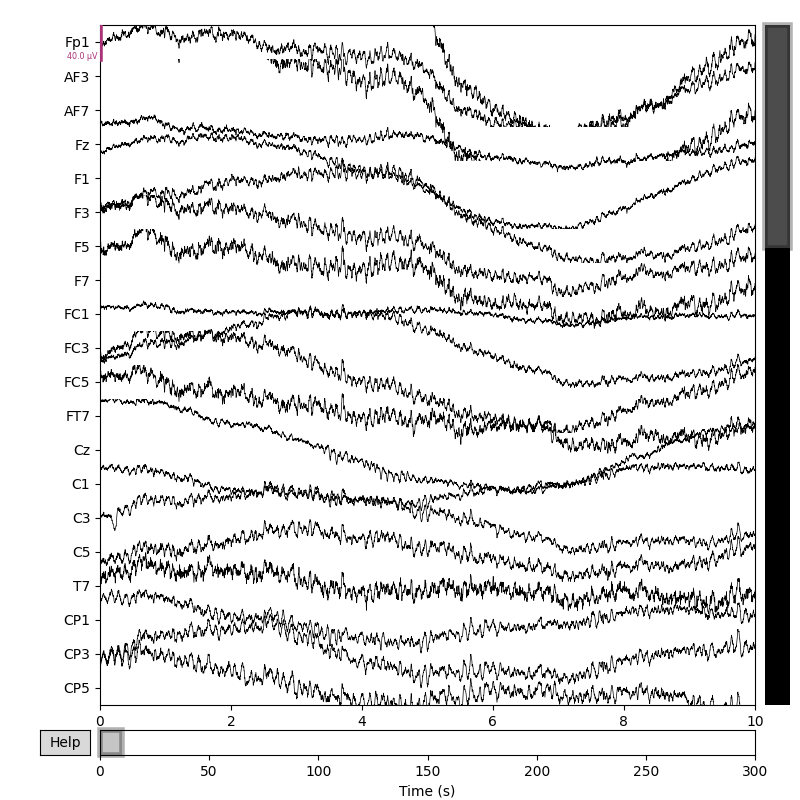

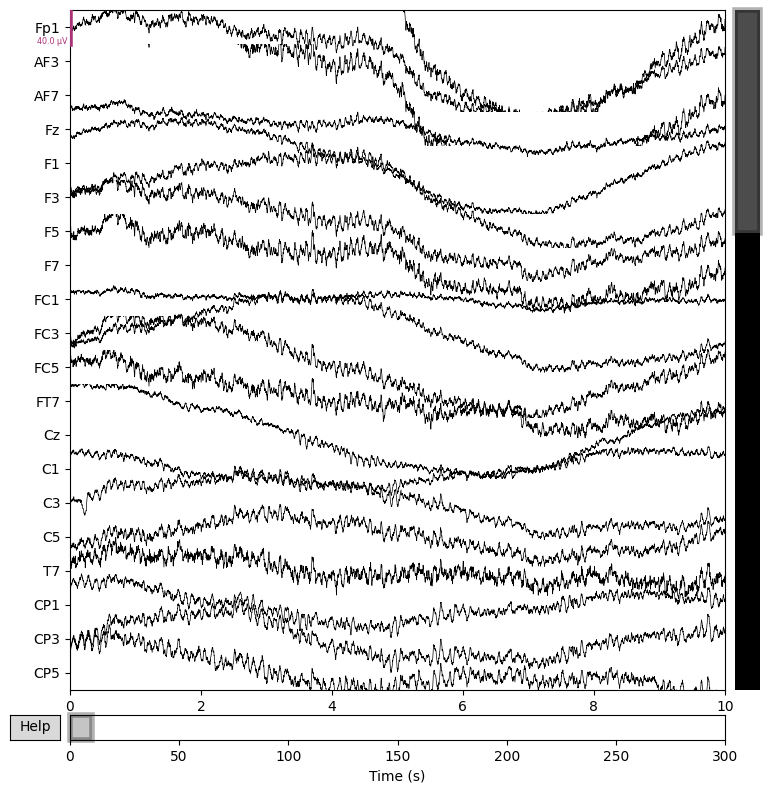

In [95]:
subj = Path(healthy, "sub-01")
session = Path(subj, "ses-1", "eeg")
h_edf = mne.io.read_raw_eeglab(
    Path(session, "sub-01_ses-1_task-eyesclosed_eeg.set"),
    preload=True
)
h_edf.set_montage("standard_1020", on_missing="warn")
display(h_edf.info)
# display(h_edf.ch_names)
h_edf.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edg

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, C3, O1, Cp5, Fp2, C4, O2, Cp6
 chs: 8 EEG
 custom_ref_applied: False
 dig: 9 items (3 Cardinal, 6 EEG)
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 8
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

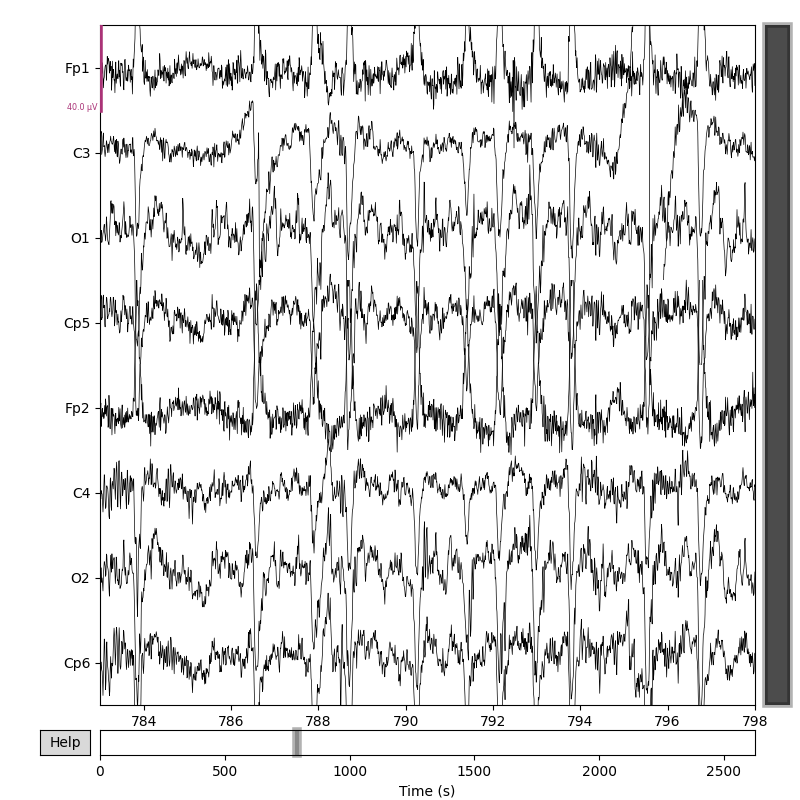

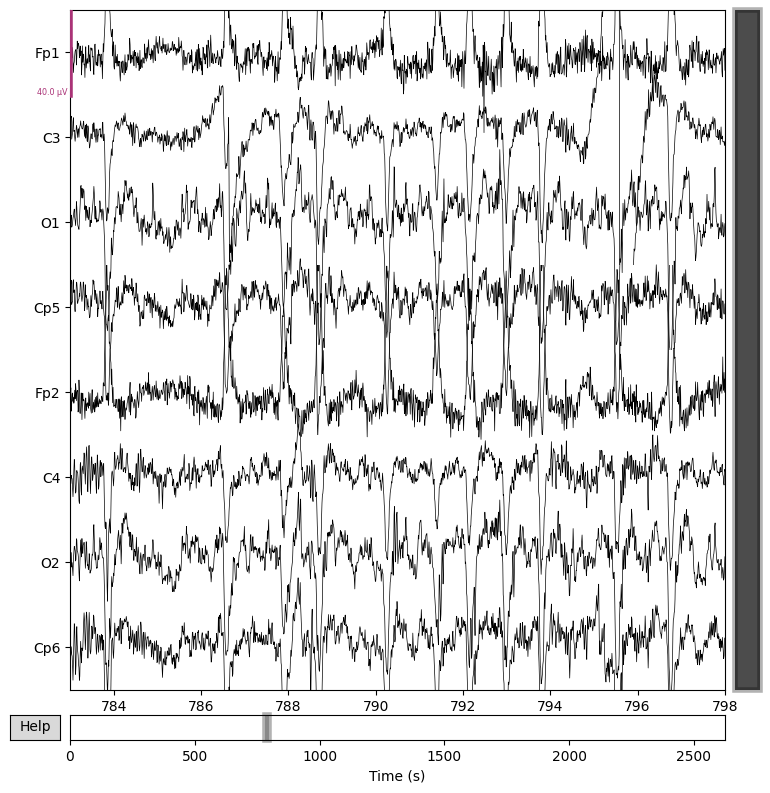

In [156]:
subj = Path(epilepsy, "PN00")
ep_edf = mne.io.read_raw_edf(
    Path(subj, "PN00-1.edf"),
    preload=True,
    infer_types=True,
    # exclude=["EKG EKG", "SPO2", "HR", "1", "2", "MK"],
    # exclude=["SPO2", "HR", "1", "2", "MK"],
    include=['Fp1', 'Fp2', 'Cp5', 'Cp6', 'C3', 'C4', 'O1', 'O2'],
    verbose=False,
)

ep_edf = ep_edf.copy().filter(l_freq=1, h_freq=40).notch_filter(60)
# ep_edf = mne.set_bipolar_reference(
#     ep_edf,
#     anode=['Fp1', 'F3', 'C3', 'P3', 'F4', 'C4', 'P4', 'Fp1', 'F7', 'T3', 'T5', 'F8', 'Fz', 'Cz'],    
#     cathode=['F3', 'C3', 'P3', 'O1', 'C4', 'P4', 'O2', 'F7', 'T3', 'T5', 'O1', 'T4', 'Cz', 'Pz'],
# )
ep_edf.set_montage("standard_1020", on_missing="ignore")
display(ep_edf.info)
# display(ep_edf.ch_names)
# ep_edf = ep_edf.crop(tmin=6830, tmax=6880)
ep_edf.plot(start=783, duration=15)

In [97]:
importlib.reload(utils)
subj = Path(epilepsy, "PN00")
file_path = Path(subj, "Seizures-list-PN00.txt")
file_map = utils.read_seizure_times(file_path)
print(file_map)

defaultdict(<class 'list'>, {'PN00-1.edf': [(1143.0, 1213.0)], 'PN00-2.edf': [(1220.0, 1274.0)], 'PN00-3.edf': [(765.0, 4425.0)], 'PN00-4.edf': [(1006.0, 1080.0)], 'PN00-5.edf': [(904.0, 971.0)]})


In [151]:
importlib.reload(utils)
cropped_ep_edf_map = utils.createCroppedFif(datasets, epilepsy)

processing folder: PN00
defaultdict(<class 'list'>, {'PN00-1.edf': [(1143.0, 1213.0)], 'PN00-2.edf': [(1220.0, 1274.0)], 'PN00-3.edf': [(765.0, 4425.0)], 'PN00-4.edf': [(1006.0, 1080.0)], 'PN00-5.edf': [(904.0, 971.0)]})
  Found EDF file: PN00-1.edf
    File: PN00-1.edf -> start: 783.0 | end: 1083.0
  Found EDF file: PN00-2.edf
    File: PN00-2.edf -> start: 860.0 | end: 1160.0
  Found EDF file: PN00-3.edf
    File: PN00-3.edf -> start: 405.0 | end: 705.0
  Found EDF file: PN00-4.edf
    File: PN00-4.edf -> start: 646.0 | end: 946.0
  Found EDF file: PN00-5.edf
    File: PN00-5.edf -> start: 544.0 | end: 844.0
processing folder: PN01
defaultdict(<class 'list'>, {'PN01-1.edf': [(10218.0, 10272.0), (46353.0, 46427.0)]})
  Found EDF file: PN01-1.edf
    File: PN01-1.edf -> start: 9858.0 | end: 10158.0
    File: PN01-1.edf -> start: 45993.0 | end: 46293.0
processing folder: PN03
defaultdict(<class 'list'>, {'PN03-1.edf': [(38673.0, 38784.0)], 'PN03-2.edf': [(34921.0, 35054.0)]})
  Found ED

In [129]:
print(cropped_ep_edf_map)

{'cropped_ep1_raw.fif': 'PN00', 'cropped_ep2_raw.fif': 'PN00', 'cropped_ep3_raw.fif': 'PN00', 'cropped_ep4_raw.fif': 'PN00', 'cropped_ep5_raw.fif': 'PN00', 'cropped_ep6_raw.fif': 'PN01', 'cropped_ep7_raw.fif': 'PN01', 'cropped_ep8_raw.fif': 'PN03', 'cropped_ep9_raw.fif': 'PN03', 'cropped_ep10_raw.fif': 'PN05', 'cropped_ep11_raw.fif': 'PN05', 'cropped_ep12_raw.fif': 'PN05', 'cropped_ep13_raw.fif': 'PN06', 'cropped_ep14_raw.fif': 'PN06', 'cropped_ep15_raw.fif': 'PN06', 'cropped_ep16_raw.fif': 'PN06', 'cropped_ep17_raw.fif': 'PN06', 'cropped_ep18_raw.fif': 'PN07', 'cropped_ep19_raw.fif': 'PN09', 'cropped_ep20_raw.fif': 'PN09', 'cropped_ep21_raw.fif': 'PN09', 'cropped_ep22_raw.fif': 'PN10', 'cropped_ep23_raw.fif': 'PN10', 'cropped_ep24_raw.fif': 'PN10', 'cropped_ep25_raw.fif': 'PN10', 'cropped_ep26_raw.fif': 'PN10', 'cropped_ep27_raw.fif': 'PN10', 'cropped_ep28_raw.fif': 'PN10', 'cropped_ep29_raw.fif': 'PN10', 'cropped_ep30_raw.fif': 'PN10', 'cropped_ep31_raw.fif': 'PN10', 'cropped_ep32_ra

Opening raw data file Datasets\cropped_ep_dataset\cropped_ep1_raw.fif...
    Range : 400896 ... 554496 =    783.000 ...  1083.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


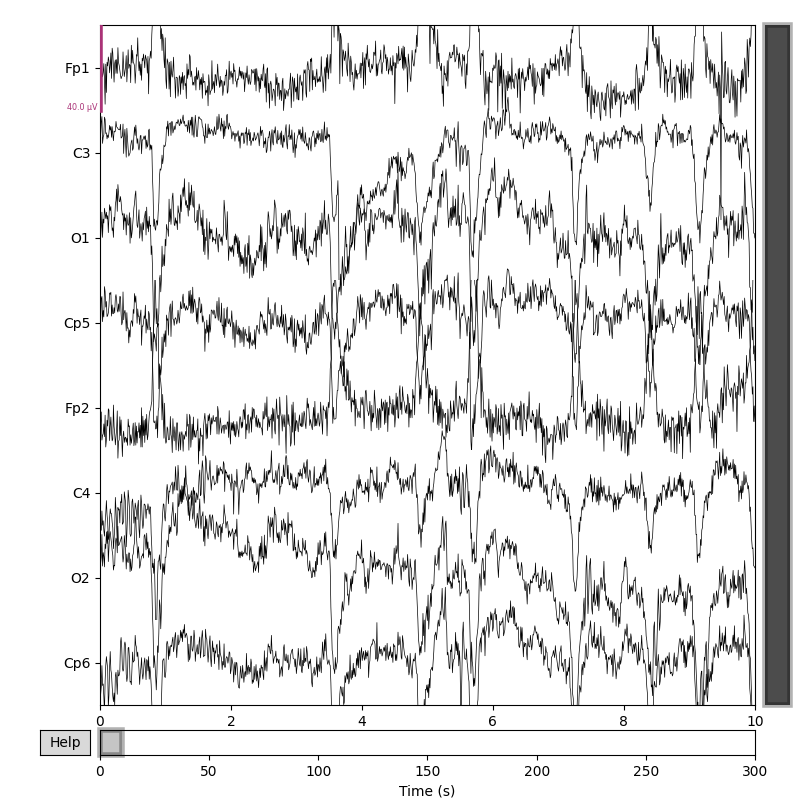

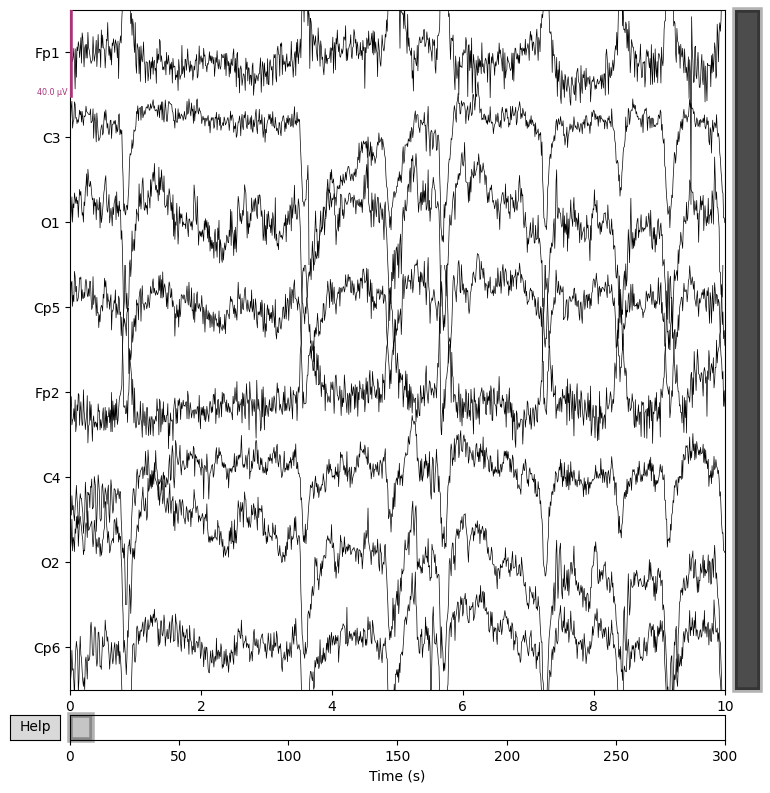

In [152]:

cropped_ep_datasets_path = Path(datasets, "cropped_ep_dataset")
cropped_ep_edf = mne.io.read_raw_fif(Path(cropped_ep_datasets_path, "cropped_ep1_raw.fif"), preload=True)

cropped_ep_edf.plot()

In [153]:
importlib.reload(utils)

epoch_subj_map = utils.createEpochFif(cropped_ep_edf_map)

cropped_ep10_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep10_raw.fif...
    Range : 3483136 ... 3636736 =   6803.000 ...  7103.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep11_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep11_raw.fif...
    Range : 3315712 ... 3469312 =   6476.000 ...  6776.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep12_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep12_raw.fif...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch1-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch2-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


    Range : 1662976 ... 1816576 =   3248.000 ...  3548.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep13_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep13_raw.fif...
    Range : 2674176 ... 2827776 =   5223.000 ...  5523.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep14_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep14_raw.fif...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch3-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch4-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


    Range : 4352000 ... 4505600 =   8500.000 ...  8800.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep15_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep15_raw.fif...
    Range : 3028480 ... 3182080 =   5915.000 ...  6215.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep16_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep16_raw.fif...
    Range : 2856448 ... 3010048 =   5579.000 ...  5879.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch5-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch6-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep17_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep17_raw.fif...
    Range : 2264576 ... 2418176 =   4423.000 ...  4723.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep18_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep18_raw.fif...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch7-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch8-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


    Range : 11109888 ... 11263488 =  21699.000 ... 21999.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep19_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep19_raw.fif...
    Range : 3527168 ... 3680768 =   6889.000 ...  7189.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep1_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep1_raw.fif...
    Range : 400896 ... 554496 =    783.000 ...  1083.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch9-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch10-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep20_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep20_raw.fif...
    Range : 3464704 ... 3618304 =   6767.000 ...  7067.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep21_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep21_raw.fif...
    Range : 3512832 ... 3666432 =   6861.000 ...  7161.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch11-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch12-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep22_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep22_raw.fif...
    Range : 3678720 ... 3832320 =   7185.000 ...  7485.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep23_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep23_raw.fif...
    Range : 3899904 ... 4053504 =   7617.000 ...  7917.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch13-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch14-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep24_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep24_raw.fif...
    Range : 3808256 ... 3961856 =   7438.000 ...  7738.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep25_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep25_raw.fif...
    Range : 3827200 ... 3980800 =   7475.000 ...  7775.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch15-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch16-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep26_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep26_raw.fif...
    Range : 997888 ... 1151488 =   1949.000 ...  2249.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep27_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep27_raw.fif...
    Range : 3166208 ... 3319808 =   6184.000 ...  6484.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch17-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch18-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep28_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep28_raw.fif...
    Range : 5562880 ... 5716480 =  10865.000 ... 11165.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep29_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep29_raw.fif...
    Range : 1222656 ... 1376256 =   2388.000 ...  2688.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch19-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch20-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep2_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep2_raw.fif...
    Range : 440320 ... 593920 =    860.000 ...  1160.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep30_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep30_raw.fif...
    Range : 2610688 ... 2764288 =   5099.000 ...  5399.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch21-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch22-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep31_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep31_raw.fif...
    Range : 6432256 ... 6585856 =  12563.000 ... 12863.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep32_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep32_raw.fif...
    Range : 3683328 ... 3836928 =   7194.000 ...  7494.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch23-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch24-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep33_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep33_raw.fif...
    Range : 487424 ... 641024 =    952.000 ...  1252.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep34_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep34_raw.fif...
    Range : 4715520 ... 4869120 =   9210.000 ...  9510.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch25-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch26-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep35_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep35_raw.fif...
    Range : 210944 ... 364544 =    412.000 ...   712.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep36_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep36_raw.fif...
    Range : 4839424 ... 4993024 =   9452.000 ...  9752.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch27-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch28-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep37_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep37_raw.fif...
    Range : 3431424 ... 3585024 =   6702.000 ...  7002.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep38_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep38_raw.fif...
    Range : 3527168 ... 3680768 =   6889.000 ...  7189.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch29-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch30-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep39_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep39_raw.fif...
    Range : 3682816 ... 3836416 =   7193.000 ...  7493.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep3_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep3_raw.fif...
    Range : 207360 ... 360960 =    405.000 ...   705.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch31-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch32-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep40_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep40_raw.fif...
    Range : 3533824 ... 3687424 =   6902.000 ...  7202.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep41_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep41_raw.fif...
    Range : 3644928 ... 3798528 =   7119.000 ...  7419.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch33-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch34-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep42_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep42_raw.fif...
    Range : 8796160 ... 8949760 =  17180.000 ... 17480.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep43_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep43_raw.fif...
    Range : 2612736 ... 2766336 =   5103.000 ...  5403.000 secs
Ready.


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch35-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch36-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep44_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep44_raw.fif...
    Range : 3493888 ... 3647488 =   6824.000 ...  7124.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep45_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep45_raw.fif...
    Range : 4205568 ... 4359168 =   8214.000 ...  8514.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch37-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch38-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep46_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep46_raw.fif...
    Range : 4126720 ... 4280320 =   8060.000 ...  8360.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep47_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep47_raw.fif...
    Range : 3773952 ... 3927552 =   7371.000 ...  7671.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch39-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch40-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep4_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep4_raw.fif...
    Range : 330752 ... 484352 =    646.000 ...   946.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep5_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep5_raw.fif...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch41-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch42-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


    Range : 278528 ... 432128 =    544.000 ...   844.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep6_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep6_raw.fif...
    Range : 5047296 ... 5200896 =   9858.000 ... 10158.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep7_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep7_raw.fif...


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch43-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch44-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


    Range : 23548416 ... 23702016 =  45993.000 ... 46293.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep8_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep8_raw.fif...
    Range : 19616256 ... 19769856 =  38313.000 ... 38613.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch45-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


20 matching events found
No baseline correction applied
0 projection items activated
cropped_ep9_raw.fif
Opening raw data file Datasets\cropped_ep_dataset\cropped_ep9_raw.fif...
    Range : 17695232 ... 17848832 =  34561.000 ... 34861.000 secs
Ready.
Reading 0 ... 153600  =      0.000 ...   300.000 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated


c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch46-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency
c:\Users\Devin\Documents\Code\hack49\ml\utils.py:165: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch47-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sfreq = raw.info['sfreq']  # Sampling frequency


Reading c:\Users\Devin\Documents\Code\hack49\ml\Datasets\epoch_ep_dataset\epoch11-raw.fif ...
    Found the data of interest:
        t =       0.00 ...   14995.00 ms
        0 CTF compensation matrices available
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
{'epoch1-raw.fif': 'PN05', 'epoch2-raw.fif': 'PN05', 'epoch3-raw.fif': 'PN05', 'epoch4-raw.fif': 'PN06', 'epoch5-raw.fif': 'PN06', 'epoch6-raw.fif': 'PN06', 'epoch7-raw.fif': 'PN06', 'epoch8-raw.fif': 'PN06', 'epoch9-raw.fif': 'PN07', 'epoch10-raw.fif': 'PN09', 'epoch11-raw.fif': 'PN00', 'epoch12-raw.fif': 'PN09', 'epoch13-raw.fif': 'PN09', 'epoch14-raw.fif': 'PN10', 'epoch15-raw.fif': 'PN10', 'epoch16-raw.fif': 'PN10', 'epoch17-raw.fif': 'PN10', 'epoch18-raw.fif': 'PN10', 'epoch19-raw.fif': 'PN10', 'epoch20-raw.fif': 'PN10', 'epoch21-raw.fif': 'PN10', 'epoch22-raw.fif': 'PN00', 'epoch23-raw.fif': 'PN10', 'epoch24-raw.fif': 'PN10', 'epoch25-raw.fif': 'PN11', 'epoch26-raw.f

C:\Users\Devin\AppData\Local\Temp\ipykernel_23048\4202815633.py:1: RuntimeWarning: This filename (Datasets\epoch_ep_dataset\epoch11-raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoch = mne.read_epochs(Path(datasets, 'epoch_ep_dataset/epoch11-raw.fif'), preload=True)


<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, C3, O1, Cp5, Fp2, C4, O2, Cp6
 chs: 8 EEG
 custom_ref_applied: False
 dig: 9 items (3 Cardinal, 6 EEG)
 file_id: 4 items (dict)
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 200.0 Hz
>

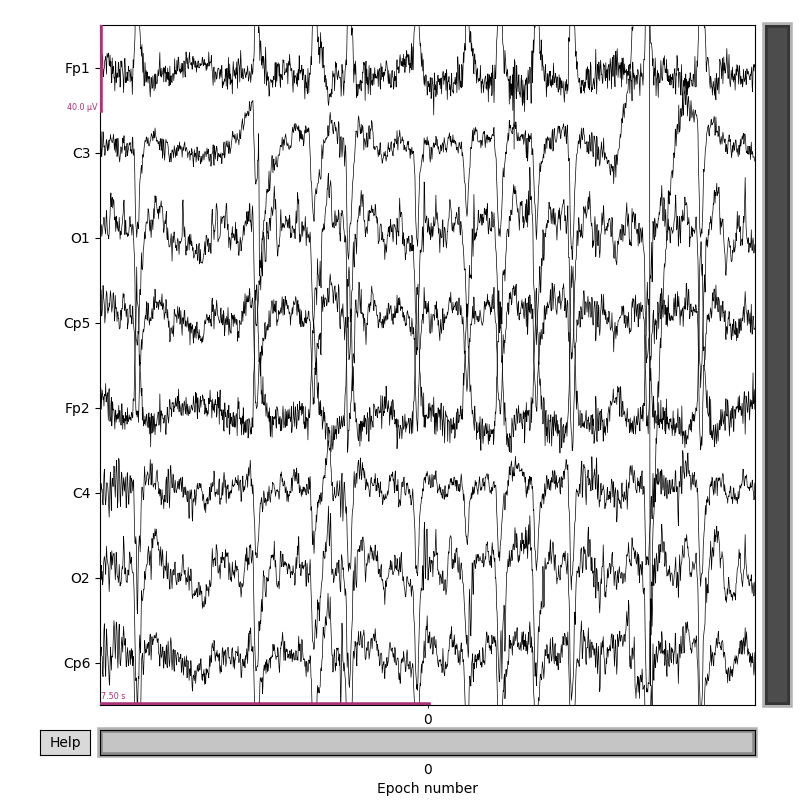

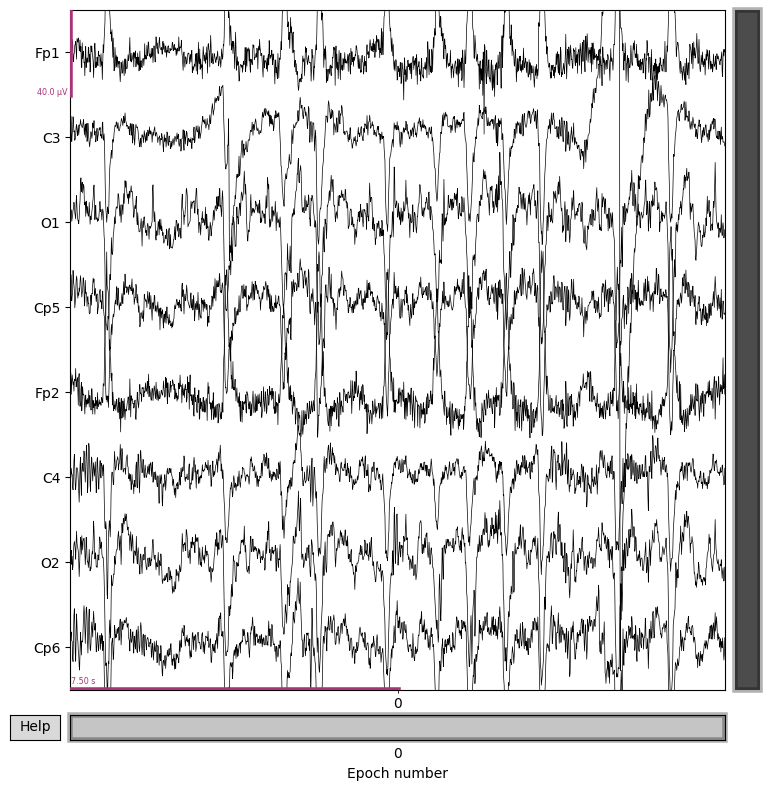

In [155]:
epoch = mne.read_epochs(Path(datasets, 'epoch_ep_dataset/epoch11-raw.fif'), preload=True)

print(epoch_subj_map)
display(epoch.info)
epoch[0].plot()

In [170]:
importlib.reload(utils)
utils.createHealthyFif(healthy)

sub-01
  ses-1
    sub-01_ses-1_task-eyesclosed_eeg.set
sub-02
  ses-1
    sub-02_ses-1_task-eyesclosed_eeg.set
sub-03
  ses-1
    sub-03_ses-1_task-eyesclosed_eeg.set
sub-04
  ses-1
    sub-04_ses-1_task-eyesclosed_eeg.set
sub-05
  ses-1
    sub-05_ses-1_task-eyesclosed_eeg.set
sub-06
  ses-1
    sub-06_ses-1_task-eyesclosed_eeg.set
sub-07
  ses-1
    sub-07_ses-1_task-eyesclosed_eeg.set
sub-08
  ses-1
    sub-08_ses-1_task-eyesclosed_eeg.set
sub-09
  ses-1
    sub-09_ses-1_task-eyesclosed_eeg.set
sub-10
  ses-1
    sub-10_ses-1_task-eyesclosed_eeg.set
sub-11
  ses-1
    sub-11_ses-1_task-eyesclosed_eeg.set
sub-12
  ses-1
    sub-12_ses-1_task-eyesclosed_eeg.set
sub-13
  ses-1
    sub-13_ses-1_task-eyesclosed_eeg.set
sub-14
  ses-1
    sub-14_ses-1_task-eyesclosed_eeg.set
sub-15
  ses-1
    sub-15_ses-1_task-eyesclosed_eeg.set
sub-16
  ses-1
    sub-16_ses-1_task-eyesclosed_eeg.set
sub-17
  ses-1
    sub-17_ses-1_task-eyesclosed_eeg.set
sub-18
  ses-1
    sub-18_ses-1_task-eyesclosed_